Examples from the book series visual quantum mechanics. by Bernd Thaller <br>
<br> 
Modified    By    Reason <br> 
--------    ---   ------ <br>
01-Aug-23   CBL   Original <br> 
10-Aug-23   CBL   Modified to use A complex to hsv converter. 
<hr> 
References: <br> 
https://vqm.uni-graz.at/ <br> 
https://matplotlib.org/stable/gallery/mplot3d/surface3d.html <br>
https://stackoverflow.com/questions/24897681/python-2d-color-map-with-imshow <br>
https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/pcolormesh_levels.html#sphx-glr-gallery-images-contours-and-fields-pcolormesh-levels-py <br>
https://www.tutorialspoint.com/how-to-plot-a-smooth-2d-color-plot-for-z-f-x-y-in-matplotlib <br>
https://stackoverflow.com/questions/37520251/plotting-hsv-values-with-imshow <br>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import hsv_to_rgb
import matplotlib.colors as mcolors

What I did not appreciate is that Visual Quantum Mechanics uses HLS Hue, Lightness, Saturation as compared
with HSV Hue, Saturation Value. In both instances Hue is described by an angle around a circle. Saturation is {0:100}% in both cases and is the magnitude of the vector representing the point on the 
circle. Value goes from {0 Black to 100% White}. HLS the Lightness is the {0Black to 1White} Which now that I write it seems the same. <br> 
https://support.ptc.com/help/mathcad/r9.0/en/index.html#page/PTC_Mathcad_Help/hls_and_hsv_color_representations.html

Trying to create an HSV plot where: <br>
$z = x + jy $ <br>
A complex number z can be represented by its "absolute value" (or "modulus") $|z|$ and by its "argument" (or "phase") $arg(z)$. The absolute value is the distance of z from the origin in the complex plane, arg(z) is the angle between the line from (0,0) to (x,y) and the positive x-axis. The polar representation of z reads: <br>
$Z = |z|e^{i*arg(z)}$<br>

The color map uses the HLS color system ("hue-lightness-saturation"). The hue represents the argument arg(z) of the complex number z. The absolute value abs(z) is given by the lightness of the color. All colors of the color map have the maximal saturation (with respect to the given lightness).

In [2]:
def complex_to_rgb(zz):
    """
    input a complex number and return an rgb value
    @param zz input complex value, assume a square matrix
    This is going to be fed into hsv_to_rgb which claims that each input is bound between 0:1
    """
    norm   = mcolors.Normalize()
    if (zz.ndim>1):
        n1 = zz.shape[0]
        n2 = zz.shape[1]
        n3 = 3
        rv = np.zeros([n1,n2,3])
        # angle has range (-pi:pi) 
        hue = np.angle(zz)
        rv[:,:,0]  =  norm(hue)
        saturation = np.absolute(zz)
        rv[:,:,1]  = norm(saturation)
        rv[:,:,2]  = 1.0
    return hsv_to_rgb(rv)

In [3]:
def G(x, y):
    s = x + 1j*y
    return s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


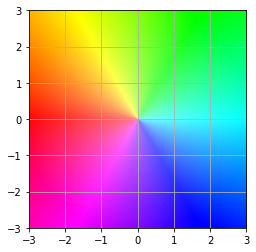

In [5]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

xx, yy = np.meshgrid(x, y)
zz     = G(xx, yy)
rgb     = complex_to_rgb(zz)
# plotting
plt.imshow(rgb, extent=[-3, 3, -3, 3])
plt.grid()
plt.show()

This is not quite what is in the book: <br>
<img src="photo/colormap.jpg"> <br> 
Damn close though, mirror about y. 